

# Project : AllLife Bank - Customer Segmentation
Student Name : Cameron Presley

Version : 2021-06-13

email : cameron@ignitedzen.net

Dataset Filename : Credit Card Customer Data.xlsx

# Background and Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

# Objective: 

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.


# Dataset:  

ALLLife bank


# Data Description: 

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.


# Deliverables


Perform EDA.

Apply Clustering Algorithms and mentions how many clusters are formed?

How are these segments different from each other?

What are your recommendations to the bank on how to better market to and service these customers?


# Submission Guidelines

There are two parts to the submission: 

A well commented Jupyter notebook [format - .ipynb]

A presentation as you would present to the top management/business leaders [format - .ppt /.pptx] 




# Outline, Actions, and Key Deliverables


- <a href = #link1>1.  Exploratory Data Analysis </a>

    - Univariate analysis
    - Bivariate analysis
    

- <a href = #link2>2.  Insights based on EDA </a>

- <a href = #link3>3.  Data Pre-processing </a>

    - Prepare the data for analysis 
    - Missing value Treatment, Outlier Detection/Treatment, Feature Engineering, Data Prep, Model Split as required


- <a href = #link4>4.  Clustering

- <a href = #link7>5.  PCA

- <a href = #link5>6.  Actionable Insights & Business Recommendations </a>


In [1]:
# In standard Markdown, place an anchor <a name="abcd"></a> 
#where you want to link to and refer to it on the same page by [link text](#abcd)

# Import Libraries & Load Dataset

In [2]:
#Import libraries and avoid warnings

import warnings
warnings.filterwarnings('ignore')

#import libraries for working arrays, dataframes, and performing linear alegebra operations
import numpy as np 
import pandas as pd 
import math

#library needed to read .xlsx files
import xlrd 

#data visualization librariers
import matplotlib.pyplot as plt
import seaborn as sns

#statistical analysis libraries
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols # for ANOVA
from statsmodels.stats.anova import anova_lm # for ANOVA
from scipy.stats import chi2_contingency # for CHI SQUARE
from scipy.stats import ttest_rel #paired T-test
from scipy.stats import levene #Levene's test

#data cleansing tools
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
import missingno as mi

#model building libraries and tools

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline, make_pipeline

# --> CLASSIFIER MODELS

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier
from io import StringIO


#--> CLUSTERING

from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#use seaborn styling
sns.set_style("whitegrid")




#Load Dataset



dataset_filename = 'Credit Card Customer Data.xlsx'
print ('Dataset Filename :', dataset_filename)
print ('')
#data = pd.read_csv(dataset_filename)

data = pd.read_excel(dataset_filename, sheet_name = 'Sheet1')

# create copy of original data

df = data.copy()

#Determine the basic shape of the data - # of rows and # of cols

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

row_num = df.shape[0]
print ('row_num =', row_num)


Dataset Filename : Credit Card Customer Data.xlsx

There are 660 rows and 7 columns.
row_num = 660


# Initial Data Review

In [3]:
#open up view of columns and increase view of row data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',50)

#set a seed value to get the same results with each random sampling of the table

np.random.seed(20)
df.sample(n=15)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
92,93,37016,5000,1,1,4,6
178,179,41787,6000,1,1,4,7
353,354,94437,9000,5,4,1,3
575,576,24748,73000,5,3,0,4
10,11,52741,10000,4,0,5,5
172,173,28842,20000,2,0,5,6
398,399,96929,67000,6,2,2,2
307,308,16374,8000,5,3,2,1
511,512,81910,49000,6,2,0,2
606,607,31948,63000,5,3,1,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [6]:
#code snipet for quick review of categorical vars
#obj_cols = ['col1_name', 'col2_name', 'col3_name', '.....']
#df[obj_cols] = df[obj_cols].astype('category')


# step through each category value and list the unique values in each category

#for i in obj_cols:
#    print('*'*40)
#    print('Unique values for',i, 'are :')
#    print(df[i].value_counts())
#    print('*'*40);

In [7]:
# check datatype conversions
# df.info()

In [8]:
#converting date columns to datetime
#df['Date'] = pd.to_datetime(df['Date'])

In [9]:
#df['Date']

In [10]:
#check conversion
#df.info()

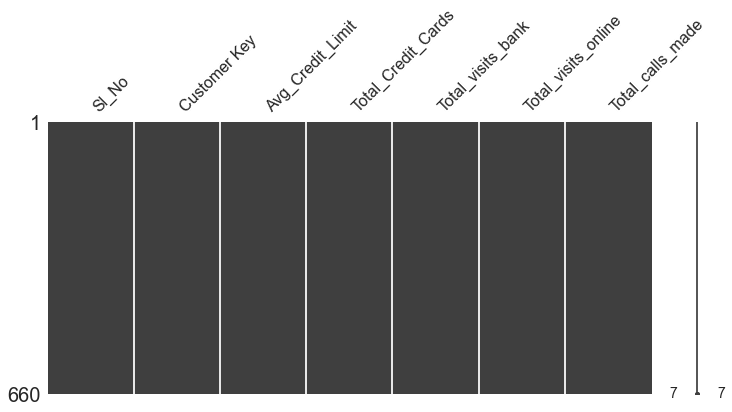

In [11]:
# Visualize the missing data spatially in the dataset

mi.matrix (df, figsize = (12,5));

In [12]:
# checking for counts for obviously missing value counts

df.isna().sum()



Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

* No obviously missing data

In [13]:
# check  for the unique values
# each row for each column
n = df.nunique(axis=0)
  
print("No.of.unique values in each column :\n",
     n)

No.of.unique values in each column :
 Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64


### first glance at the variable data distribution

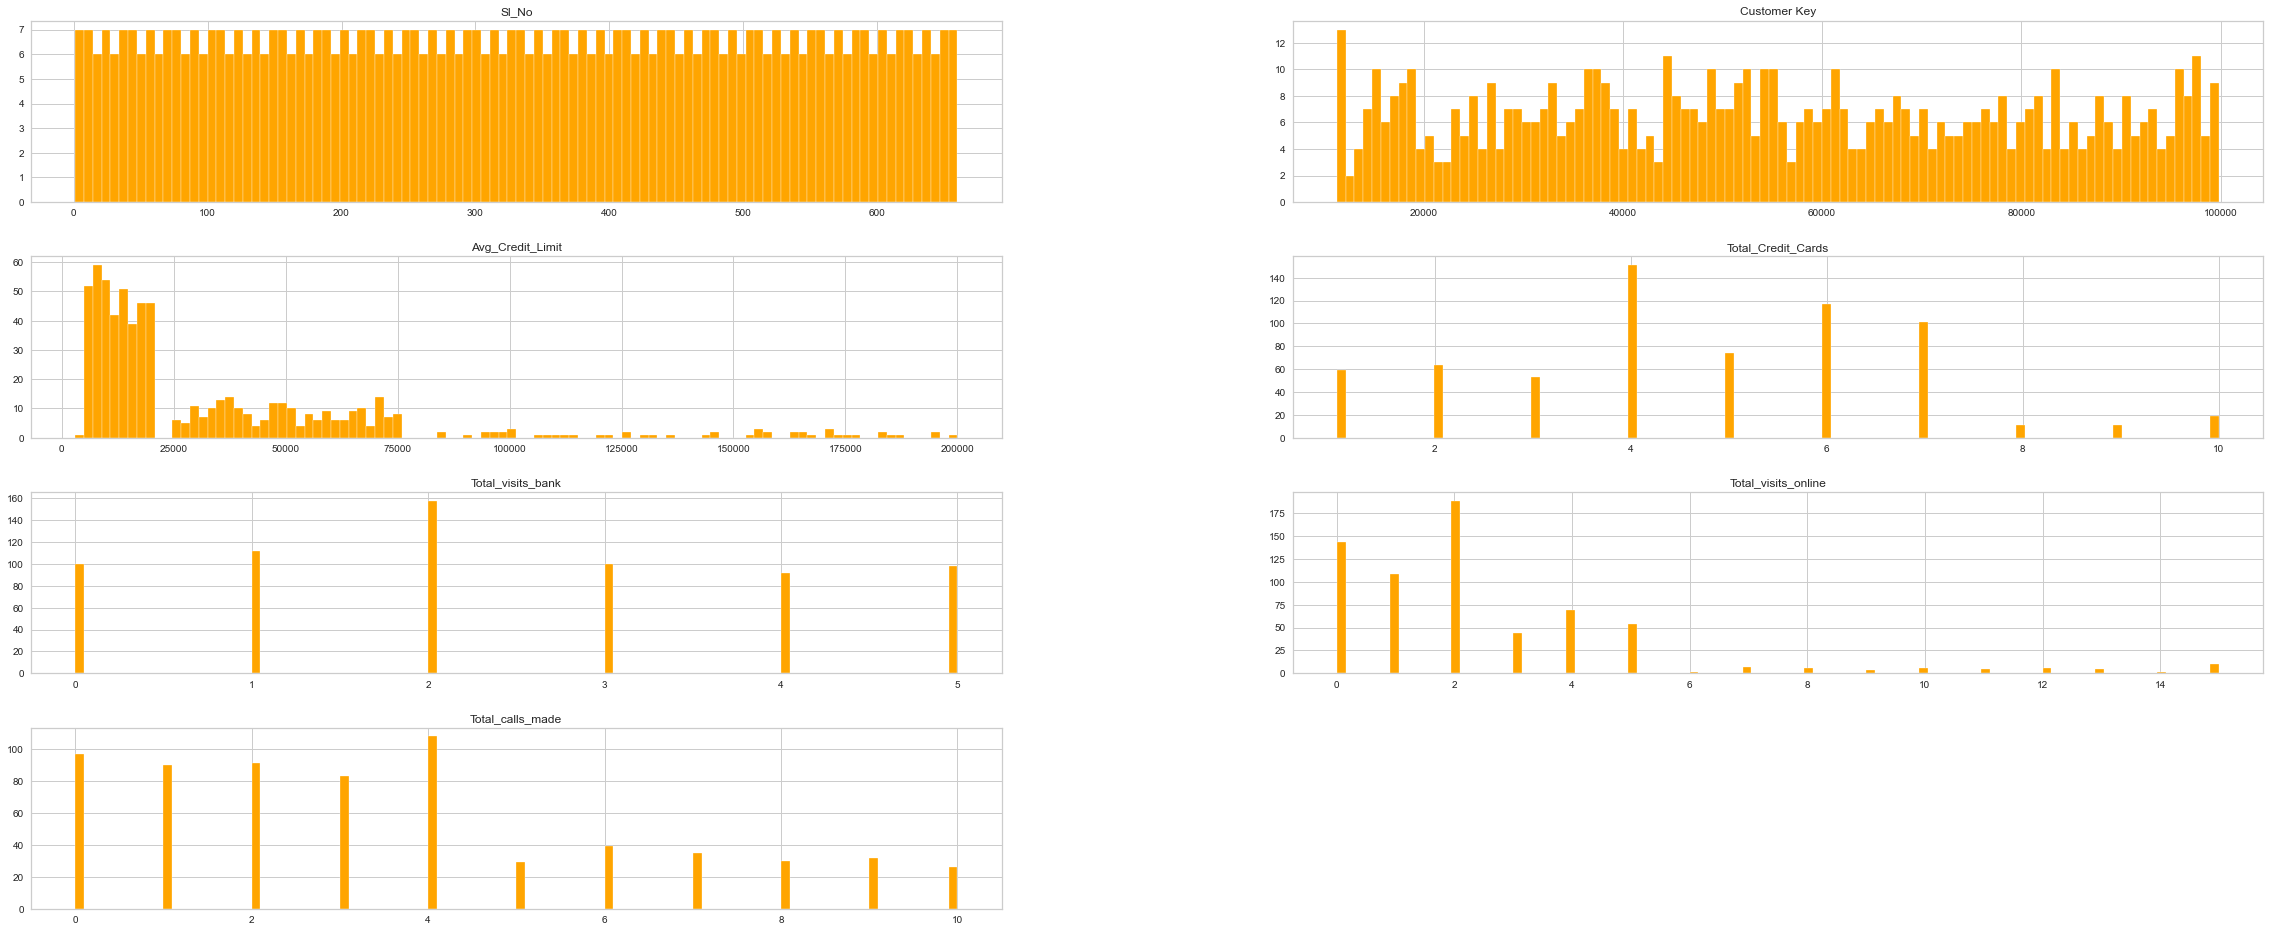

In [14]:
columns = list(df)[0:] #showing all columns
df[columns].hist(stacked=False, bins=100, figsize=(40,64), layout=(15,2), color = 'orange'); 


## initial comments on dataset

* The dataset is very clean and straightforward.
* There are 660 unique values for Sl_No.  Appears to be unique identifier for each customer.
* Same for Customer Key, however there are 655 unique numbers and no missing data, which means that there are 5 Sl_No's tht share the same Customer Key.
* These numerical identifiers are not statistically significant or useful for insights, so will drop them for simplicity.

* The data dictionary is very vague and not super helpful for making logical deductions.  While we know their average credit card limits, and the channels they visit through, total number of cards, etc...we don't know the frequency at which they make these visits.  We don't know if these cards are all from discrete accounts, or if they are simply multiple users on the same account and sharing the credit balance.  In this case, I would work more closely with the business partner to strengthen the defitions in the data dictionary to help with business insights later.  For now, I have to work with what I have.


# <a id = "link1"></a> 1.  EDA - UNIVARIATE & BIVARIATE & MULTIVARIATE ANALYSIS



# build functions to increase EDA efficiency

## Function for Numerical Variable Analysis

In [15]:
def histogram_boxplot(feature, figsize=(10,5), bins = None):
   
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows -> subplot grid= 2
                                           sharex = True, # shared x-axis on both plots
                                           gridspec_kw = {"height_ratios": (.15, .85)}, 
                                           figsize = figsize 
                                           ) # build 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='lime') # boxplot will show the mean value
    sns.distplot(feature, kde=T, ax=ax_hist2, bins=bins,color = 'red') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='orange') # For histogram
    ax_hist2.axvline(np.mean(feature), color='red', linestyle='--') # Add mean to histogram to help with assessing skewness
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to histogram to help with assessing skewness

# EDA Univariate Analysis

# Numerical variables review

## Sl_No

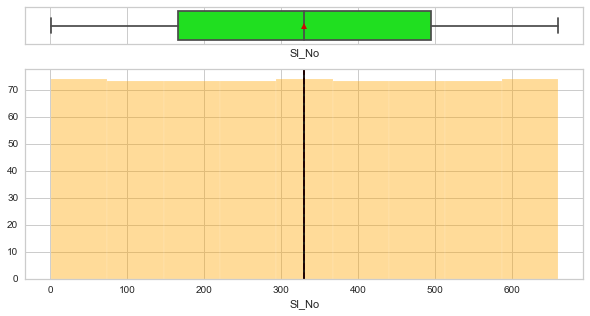

In [16]:
histogram_boxplot(df["Sl_No"])

In [17]:
miss_vals = df["Sl_No"].isnull().sum()
print ('*'*100)
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Sl_No'].describe().T

****************************************************************************************************

obvious missing values to be treated 0
****************************************************************************************************


count    660.000000
mean     330.500000
std      190.669872
min        1.000000
25%      165.750000
50%      330.500000
75%      495.250000
max      660.000000
Name: Sl_No, dtype: float64

* Unique index which will not add value to model building.  It has no statistical significance. Dropping it.

In [18]:
#dropping the Sl_No column 
df.drop('Sl_No',axis=1,inplace=True)

# Customer Key


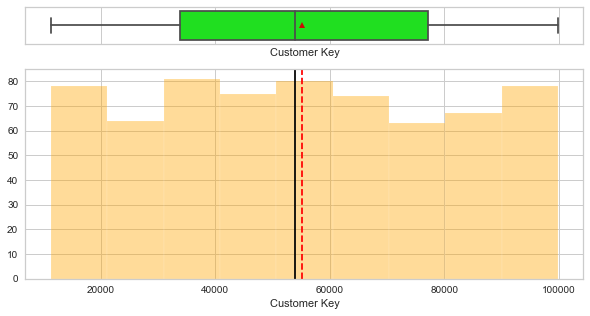

In [19]:
histogram_boxplot(df["Customer Key"])

In [20]:
miss_vals = df["Customer Key"].isnull().sum()
print ('*'*100)
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Customer Key'].describe().T

n_keys = df['Customer Key'].nunique()

n_keys

****************************************************************************************************

obvious missing values to be treated 0
****************************************************************************************************


655

* Customer Key has 655 unique values out of 660 total identifiers.  It is acting as a category as well
* There is no statistical value
* Will ignore it when building Columns list for Clustering

In [21]:
#dropping the Customer Key column 
df.drop('Customer Key',axis=1,inplace=True)

# Avg_Credit_Limit

****************************************************************************************************

obvious missing values to be treated 0
****************************************************************************************************


count       660.000000
mean      34574.242424
std       37625.487804
min        3000.000000
25%       10000.000000
50%       18000.000000
75%       48000.000000
max      200000.000000
Name: Avg_Credit_Limit, dtype: float64

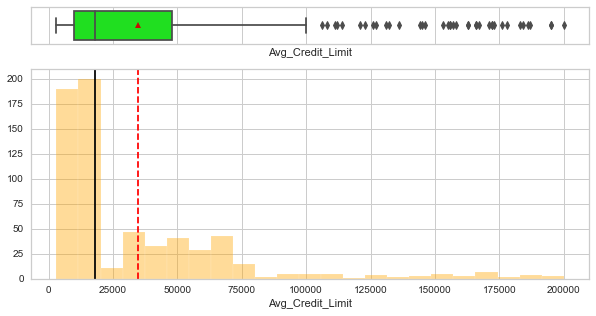

In [22]:
histogram_boxplot(df["Avg_Credit_Limit"])
miss_vals = df["Avg_Credit_Limit"].isnull().sum()
print ('*'*100)
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Avg_Credit_Limit'].describe().T

* Data is right skewed with a significant number of outliers.
* Customers have a wide range of credit limits, USD 3,000 - USD 200,000
* On average, customer have a USD 34,574 Credit limit with 50% of the customers lying between USD 10,000 and USD 48,000.  The median Credit Limit is USD 18,000.

# Total_Credit_Cards

****************************************************************************************************

obvious missing values to be treated 0
****************************************************************************************************


count    660.000000
mean       4.706061
std        2.167835
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       10.000000
Name: Total_Credit_Cards, dtype: float64

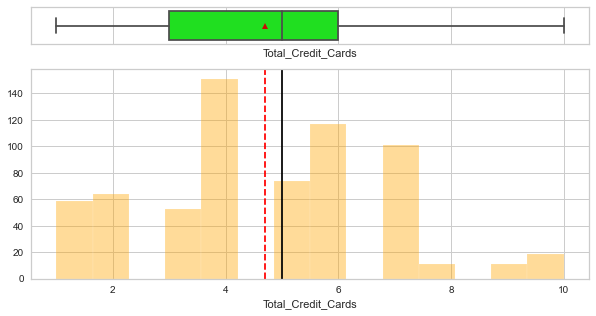

In [23]:
histogram_boxplot(df["Total_Credit_Cards"])
miss_vals = df["Total_Credit_Cards"].isnull().sum()
print ('*'*100)
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Total_Credit_Cards'].describe().T



* Customers have at least 1 credit card, and up to 10 credit cards.  Data is left skewed, i.e., customers tend toward having fewer than more credit cards.  There are no outliers.  50% of the customers will have between 3 to 6 cards.

# Total_visits_bank

****************************************************************************************************

obvious missing values to be treated 0
****************************************************************************************************


count    660.000000
mean       2.403030
std        1.631813
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: Total_visits_bank, dtype: float64

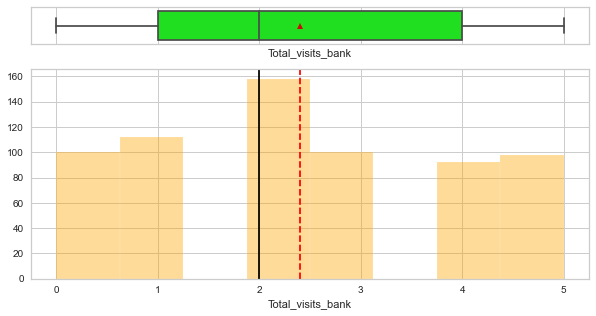

In [24]:
histogram_boxplot(df["Total_visits_bank"])
miss_vals = df["Total_visits_bank"].isnull().sum()
print ('*'*100)
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Total_visits_bank'].describe().T

* Customers tend toward more visits to the bank when they decide to make an in-person visit.  The data is right skewed.  Some never go and the Maximum number of visits is 5.  Half of all the customers will make between 1 and 4 trips.

# Total_visits_online

****************************************************************************************************

obvious missing values to be treated 0
****************************************************************************************************


count    660.000000
mean       2.606061
std        2.935724
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       15.000000
Name: Total_visits_online, dtype: float64

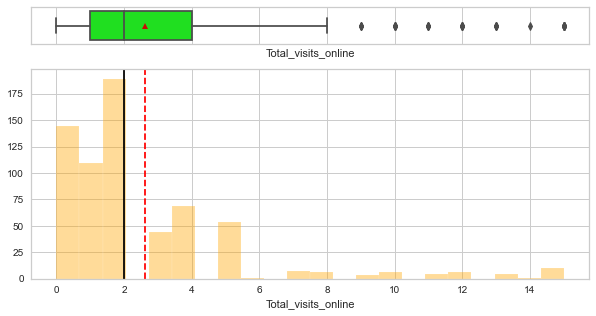

In [25]:
histogram_boxplot(df["Total_visits_online"])
miss_vals = df["Total_visits_online"].isnull().sum()
print ('*'*100)
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Total_visits_online'].describe().T

* When a customer chooses to contact the bank on-line, the average is 2.6 times. We don't know the frequency for these reported visits. Is this a monthly frequency, daily frequency, etc. There are several outliers.  Customers will range from not visiting on-line to a max visits on-line of 15. Half of the customers will visit on-line between 1 and 4 times.

# Total_calls_made

****************************************************************************************************

obvious missing values to be treated 0
****************************************************************************************************


count    660.000000
mean       3.583333
std        2.865317
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: Total_calls_made, dtype: float64

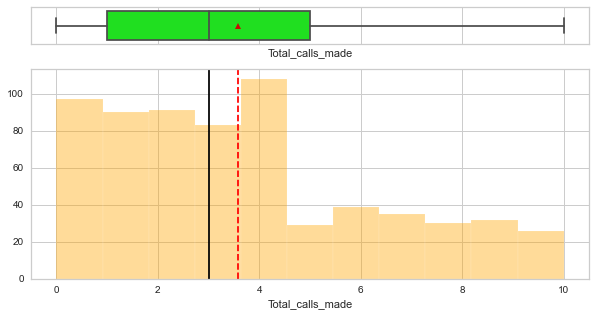

In [26]:
histogram_boxplot(df["Total_calls_made"])
miss_vals = df["Total_calls_made"].isnull().sum()
print ('*'*100)
print('')
print ('obvious missing values to be treated', miss_vals)
print('*'*100)
df['Total_calls_made'].describe().T

* When customers call in through the support line, they do so on average of 3.58 times during the time period in question.  Half of the customers will call in 1 to 5 times.  The data is right skewed.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


## Summary View of Numerical Distributions

### Setup columns for clustering + visualizations

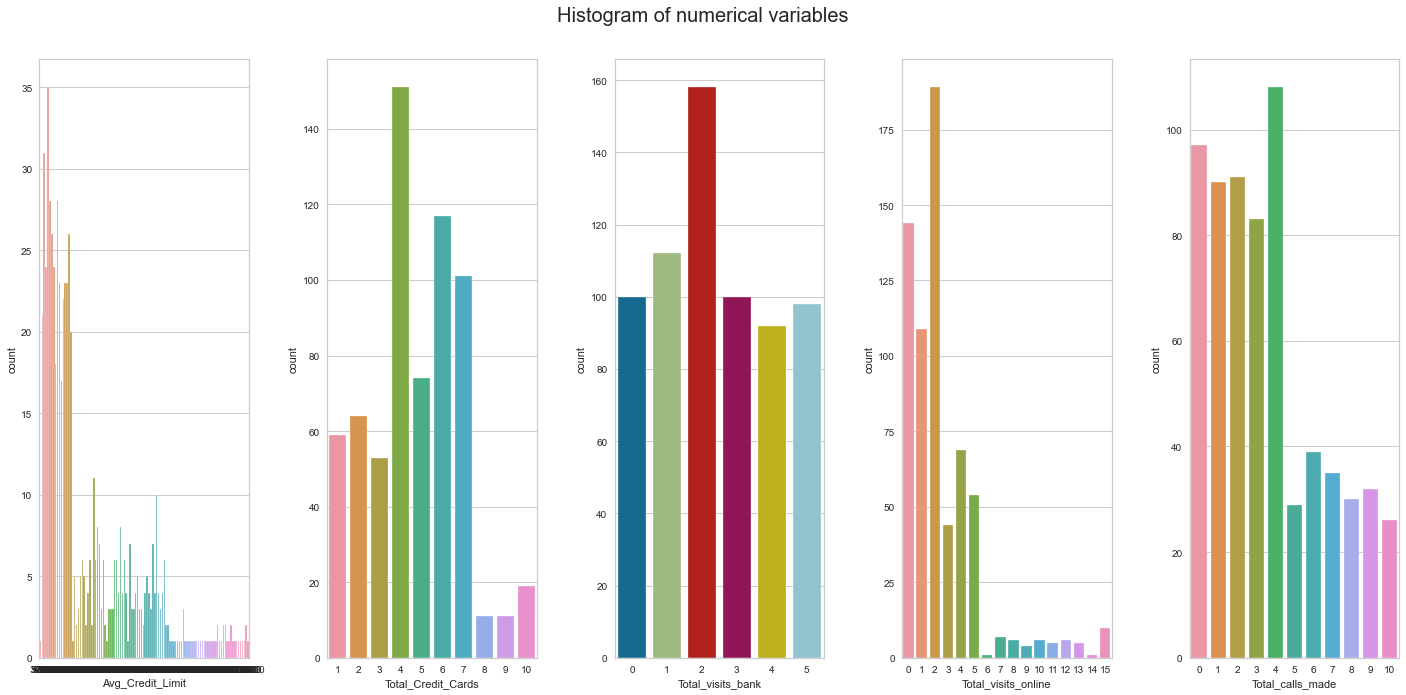

In [28]:
#ignore Customer Key, start with Col 2, collect columns that will be used for clustering
all_col = df.iloc[:,:].columns.tolist()

# building summary view of numerical values - HISTOGRAM

fig, axes = plt.subplots(1, 5, figsize=(20,10))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.countplot(ax=axes[ii],x=df[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

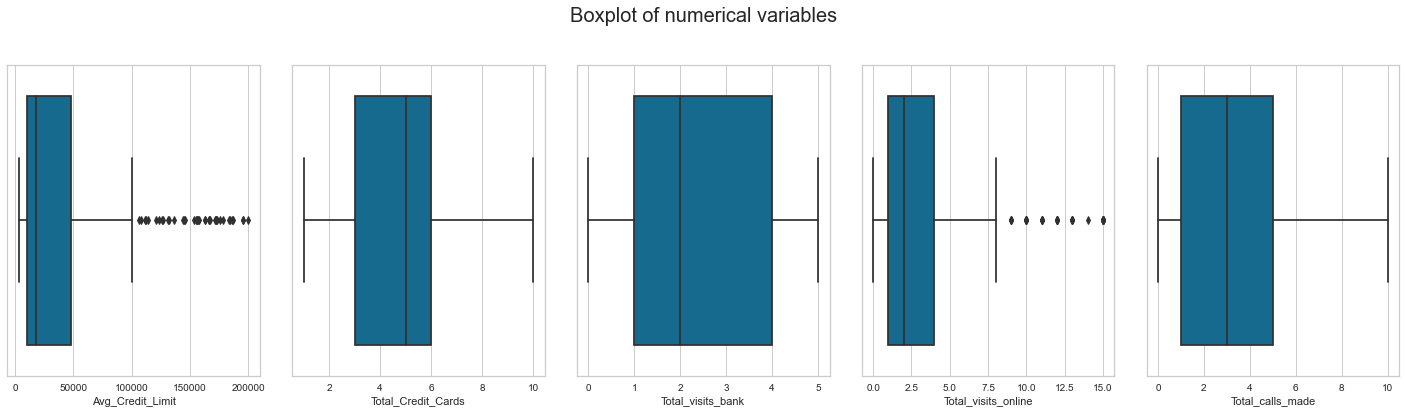

In [29]:
# Build summary boxplots 

fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Boxplot of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],x=df[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

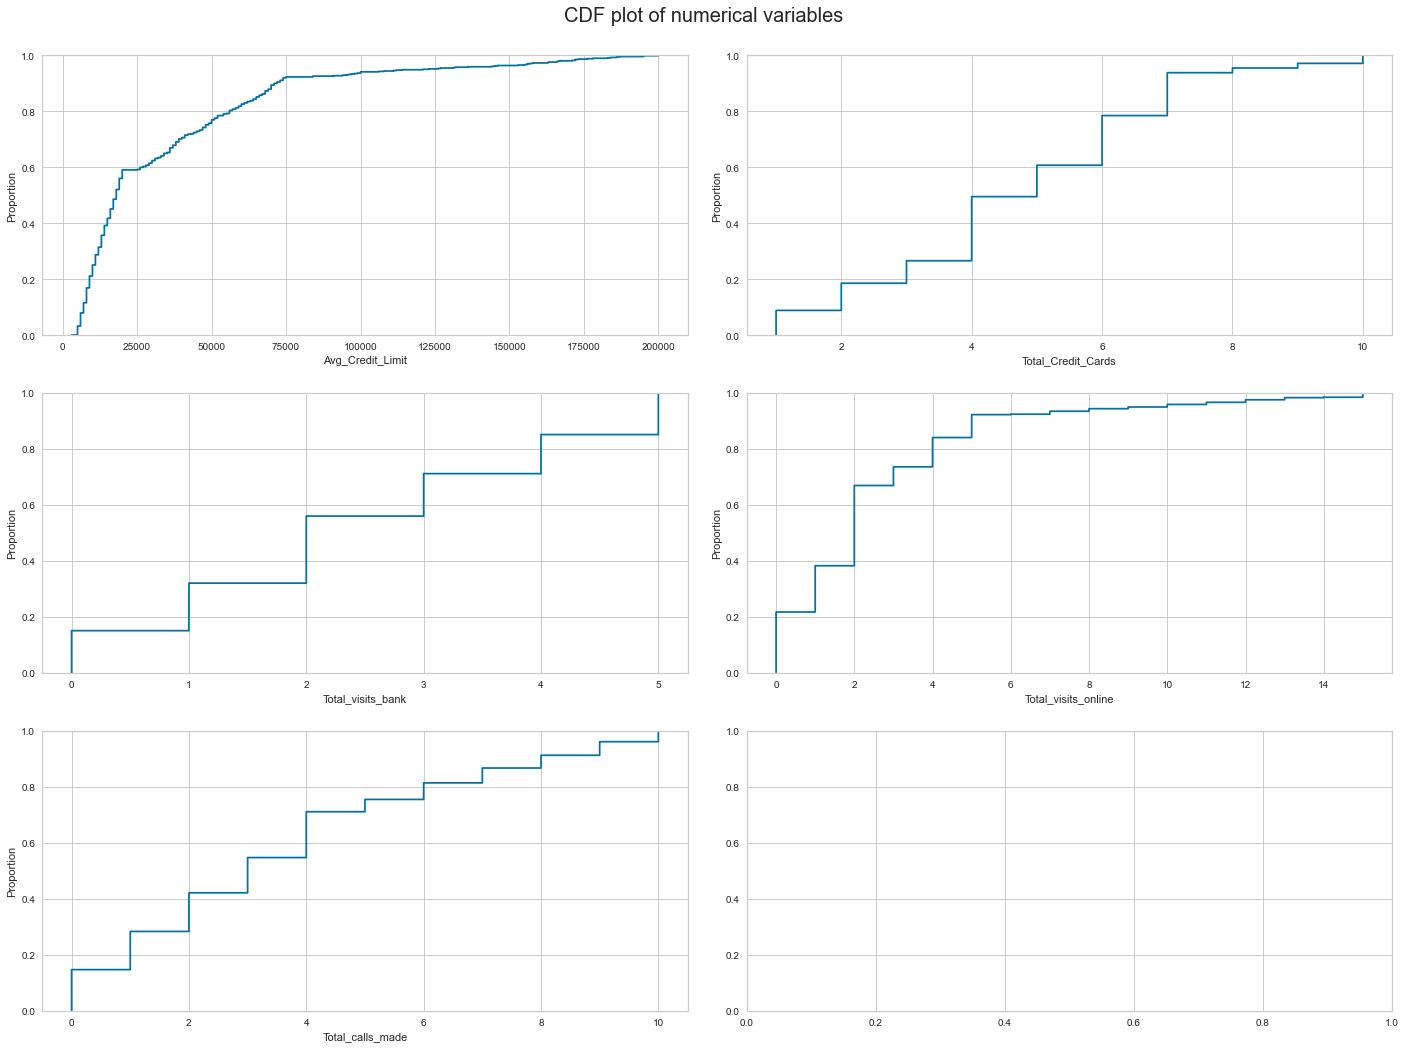

In [30]:
# select numerical columns
fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('CDF plot of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0],x=df[all_col[counter]])
    counter = counter+1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1],x=df[all_col[counter]])
        counter = counter+1
    else:
        pass


fig.tight_layout(pad=2.0)

* Only about 10% of customers have a Credit Limit over USD 75,000.
* 80% of the customers will have up to 6 credit cards.  Only 20% have more than that.
* 75% of customers will choose to visit the bank in person at least 3 times.
* 90% of customers will visit on-line at 5 times or less in a given time period.
* About 80% of the customers will make 6 or fewer calls into the support line.

##  Bivariate Analysis

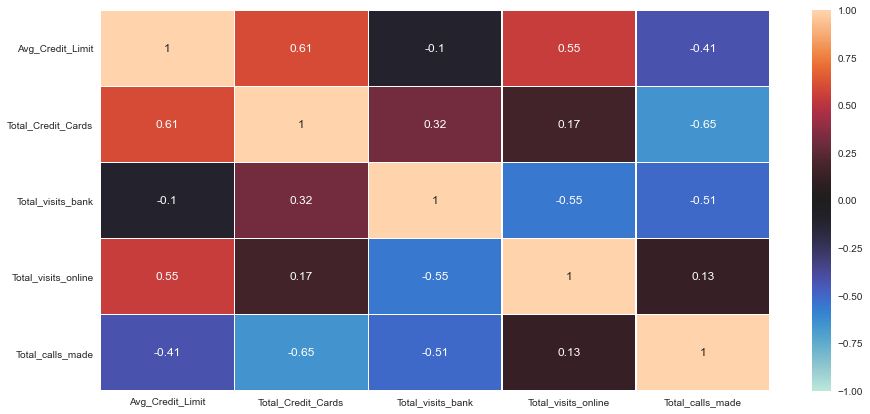

In [31]:
# Build correlation matrix

plt.figure(figsize=(15,7))

sns.heatmap(df[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)

plt.show()

* Avg_Credit_Limit is mildly (positively) correlated with Total_Credit_Cards as we would expect. 
* The Total_calls_made is mildly (negatively) correlated with Total_Credit_Cards.
* The rest are all weekly correlated.


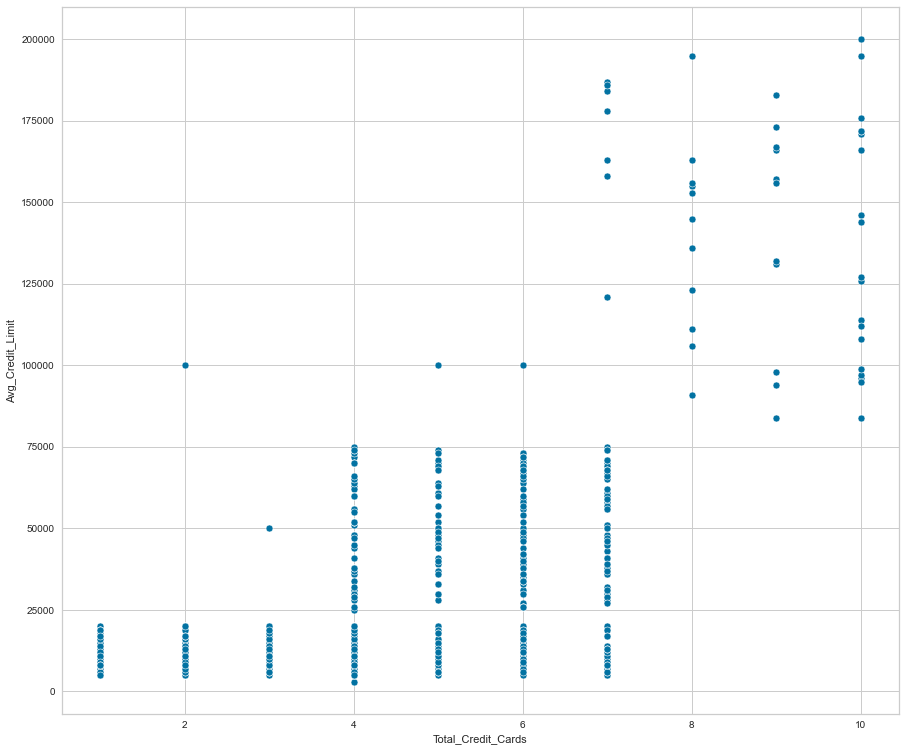

In [32]:
plt.figure(figsize=(15,13))
sns.scatterplot(x='Total_Credit_Cards', y='Avg_Credit_Limit', data=df, palette ='colorblind');

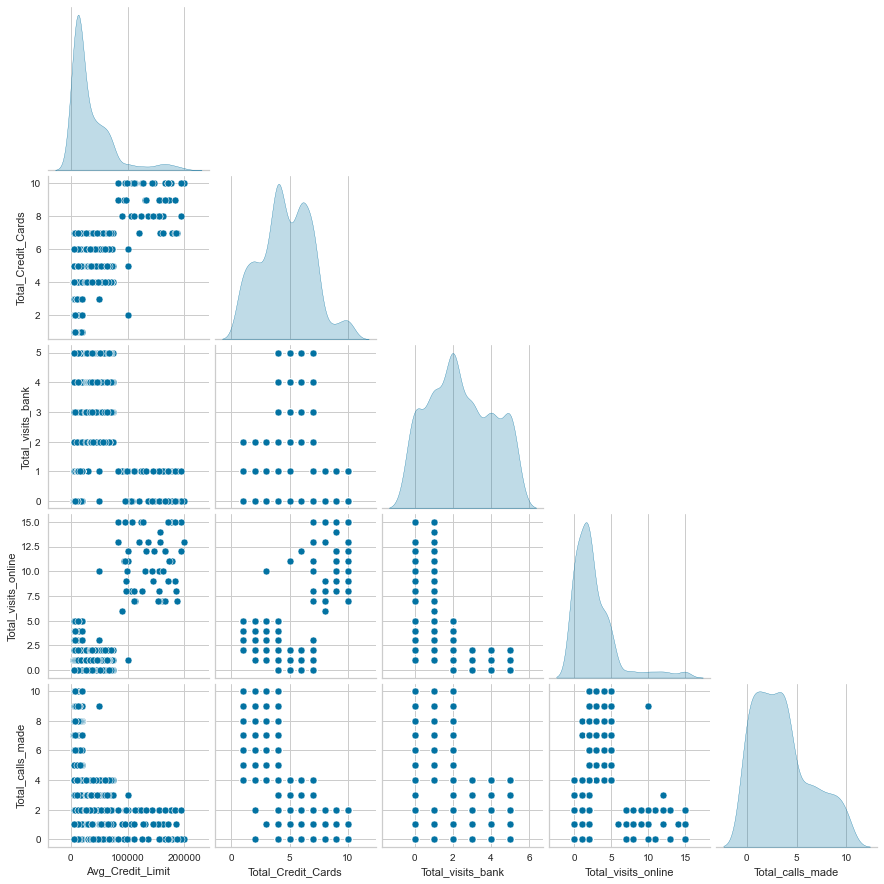

In [33]:
# Look for indicators of natural clustering counts
sns.pairplot(df[all_col],diag_kind="kde", corner = True);

### Observations

* Early indicators for natural clusters based on modality in distribtions are:

-- Avg_Credit_Limit - nothing obvious.

-- Total_Credit_cards - 2

-- Total_visits_bank - 1 to 2, nothing obvious.

-- Same for visits on_line and calls_made.



# <a id = "link2"></a> 2. Insights based on EDA







* The dataset does not contain a meaningful data dictionary to understand the features in a more nuanced fashion.  Given that we are trying to provide actional insights to Marketing and leadership to help improve customer perceptions in service, we need to get a better understanding of the time element for variables such as Total Visits to the bank in person, on-line, calls made to the support line.  It would also be good to have an understanding of the duration of those visits, calls, on-line sessions to understand how quickly a customer can gain resolution.  Or in this case, was the visit on-line or in-person for a problem to be resolved.  It is simply not clear from the amoutn of information given.

* For the same of this EDA insights and later clustering and business recommendations, I will assume the following:

- Average_Credit_Limit  : annual snapshot through any given year.  These credit limits suggest a mix of individuals and small-to-medium businesses.

- Total_Credit_Cards :  this represents a single customer, who could be a consumer or a business owner that has multiple cards on the same account with the Average_Credit_Limit reported

- In terms of visits, I will assume these numbers are annual as well as represent problem resolution visits through a specific channel....namely on-line, in person, and through a support call.

** Please note that I would want to normally validate all of this with the key stakeholders **


Customers have a wide range of credit limits, USD 3,000 - USD 200,000 suggesting a mix of personal and business banking. On average, customer have a USD 34,574 Credit limit with 50% of the customers lying between USD 10,000 and USD 48,000. The median Credit Limit is USD 18,000. The data has a significant number of outliers which are probably the handful of bsuiness customers.  This is all supported by Customers having at least 1 credit card (personal banking), and up to 10 credit cards (possibly a SMB). Data is left skewed, i.e., customers tend toward having fewer than more credit cards...again supporting the predominance of personal banking. 50% of the customers will have between 3 to 6 cards which might make sense if most of the customers were married and potentially had children who shared cards.  Unlikely that a bank is opening 3-6 discrete Credit Card accounts for a single customer.


When customers choose to visit in-person the maximum number of visits is 5. Half of all the customers will make between 1 and 4 trips which seems very high.  This is assumed to be the most inconveniencing form of problem resolution or method to get answers to any queries given the time and energy to visit the bank.  It would be good to know the time to resolve when they do visit if we could gather that form the key stakeholders.

When a customer chooses to contact the bank on-line, the average is about 2.6 times. Half of the customers will visit on-line between 1 and 4 times. Again these seem like high contact magnitudes and affected customer base, even in a year for problem resolution.  Some customers have had to visit up to 15 times.

And when a customer has to call in to resolve an issue, it sometimes has taken up to 10 calls or they have had separate needs to call in up to 10 times in a given period.   We don't know specifically, but we know on average, customers make up to 3.58 calls and over half will make between 1 and 5 calls.

Assuming again, these calls are all made in a period of 1 year, these numbers all seem very high based on personal experience in having to call into my bank to address questions or concerns with my own credit cards.  It is understandable that customers are frustrated and have a poor perception of the customer service.


We do not have enough reasons to meaningfully address the "Why?" customers have for reaching out, but we can group them in the next section to explore patterns in behavior based on their number of cards and average credit limit.



#   <a id = "link3"></a> 3.  Data Pre-processing 

*  Scale the data set ahead of clustering

  


In [34]:
scaler=StandardScaler()
subset=df[all_col].copy()
subset_scaled=scaler.fit_transform(subset)


In [35]:
#Build a dataframe out of the scaled data
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)
subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


# <a id = "link4"></a> 4. Clustering

* Build clusters, k value selection, silhouette scoring


Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9430843103448057
Number of Clusters: 7 	Average Distortion: 0.9094989512081387
Number of Clusters: 8 	Average Distortion: 0.8894012105545822


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

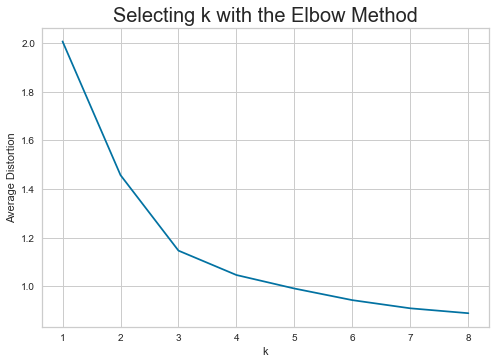

In [36]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

* Elbow curve indicates k=4 is the most appropriate value 


In [37]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41842496663215445)
For n_clusters = 3, silhouette score is 0.5157182558881063)
For n_clusters = 4, silhouette score is 0.3556670619372605)
For n_clusters = 5, silhouette score is 0.2717470361089752)
For n_clusters = 6, silhouette score is 0.2556683929337843)
For n_clusters = 7, silhouette score is 0.23382546507196023)
For n_clusters = 8, silhouette score is 0.22674420159326863)
For n_clusters = 9, silhouette score is 0.2102549893140585)


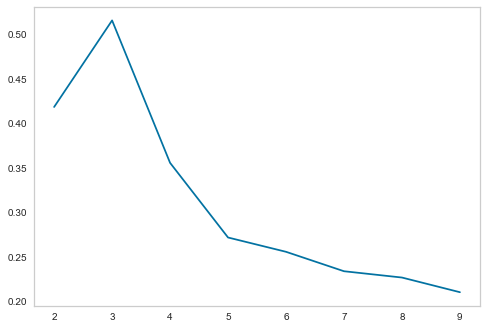

In [38]:
plt.plot(cluster_list,sil_score)
plt.grid()

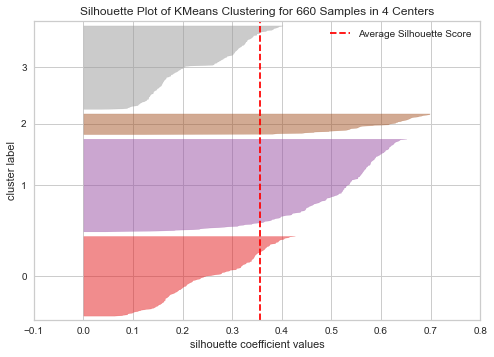

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

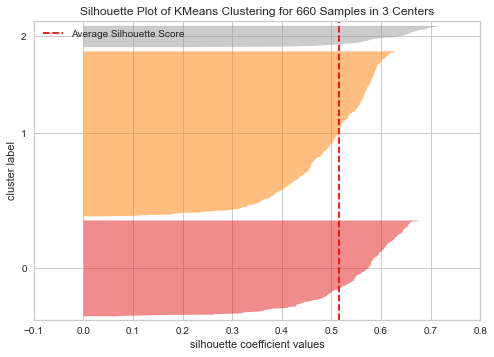

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

### Selecting 3 as the appropriate level of clusters.  There is a solid Silhouette Score and this is also indicated as the inflection in the Elbow Curve.

In [41]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [42]:
df['K_means_segments'] = kmeans.labels_

In [43]:
cluster_profile = df.groupby('K_means_segments').mean()

In [44]:
cluster_profile['count_in_each_segment'] = df.groupby('K_means_segments')['Avg_Credit_Limit'].count().values

In [45]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


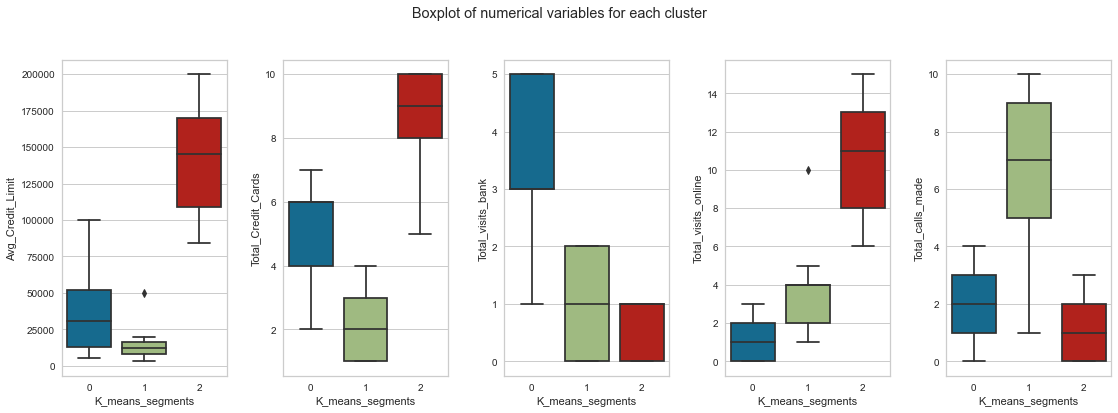

In [46]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

# Hierarchial Clustering

In [47]:
#import libraries needed for Hierarchial Clustering


from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering



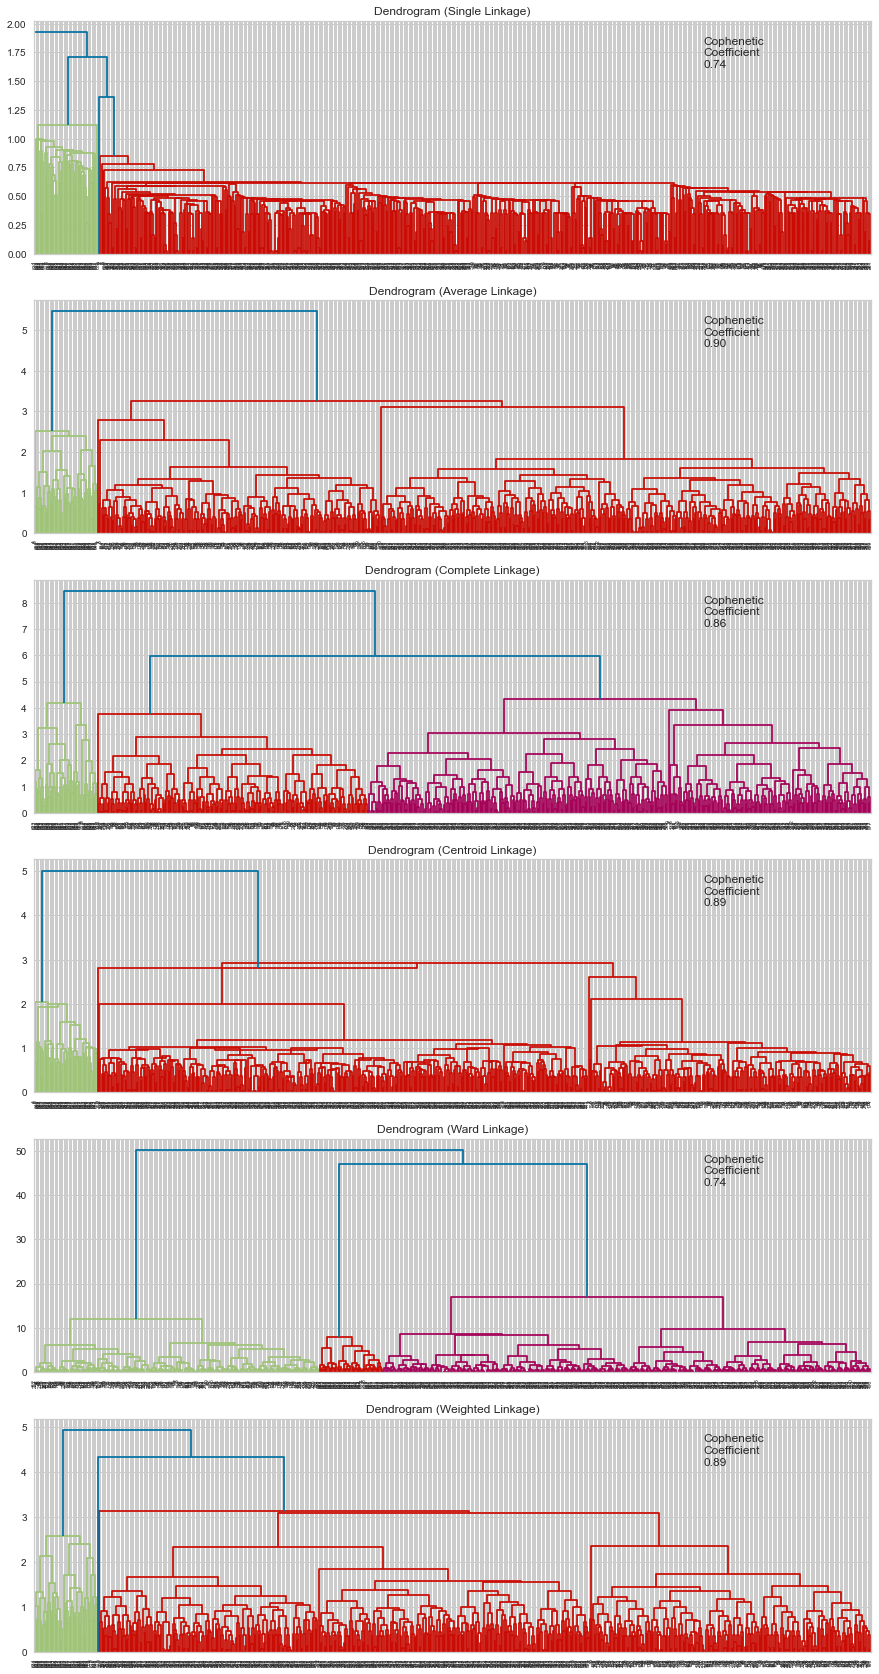

In [48]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
# compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_scaled_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
#     compare.append([method, coph_corr])

* The Ward Linkage is cleanest.  There are about 4 clusters.  Use 4 as starting point for AgglomerativeClustering.


In [49]:
#Trying with K value as 4
HCmodel = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='ward')
HCmodel.fit(subset_scaled_df)
subset_scaled_df['HC_Clusters'] = HCmodel.labels_

In [50]:
df['HC_Clusters'] = HCmodel.labels_

In [51]:
cluster_profile = df.groupby('HC_Clusters').mean()

In [52]:
# visualize cluster profile
cluster_profile.style.highlight_max(color = 'yellow', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
HC_Clusters,,,,,,
0,12151.111111,2.422222,0.937778,3.546667,6.857778,0.995556
1,38298.429319,5.670157,2.523560,0.947644,2.099476,0.000000
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000
3,29474.226804,5.365979,4.448454,1.010309,1.891753,0.000000


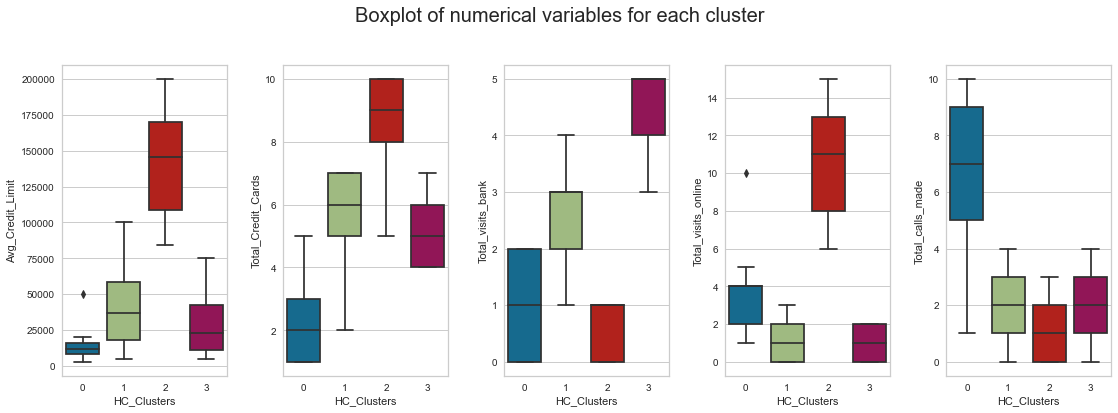

In [53]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

## Observations and comparison in KMeans Clustering and Hierarchial Clustering

* Hierarchial Clustering suggested 4 clusters verus 3 from KMeans Clustering.
* The 4th cluster contributed by Hierchial Clustering doesn't see to offer meaningfully different information than the 2nd cluster using the same technique.
* In KMeans Clustering,  the 3 clusters were fairly distinct, suggesting a clear demarcation line for each of the features of consideration, from one another.

# 5. <a id = "link7"></a> PCA

In [54]:
subset_scaled_df2 = subset_scaled_df.drop('HC_Clusters',axis=1).copy()


In [55]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(subset_scaled_df2)

PCA()

In [56]:
# Show variance explained by individual components
pca.explained_variance_ratio_

array([0.45736578, 0.37426483, 0.06401348, 0.0555688 , 0.04878711])

Text(0, 0.5, 'Cumulative Explained Variance')

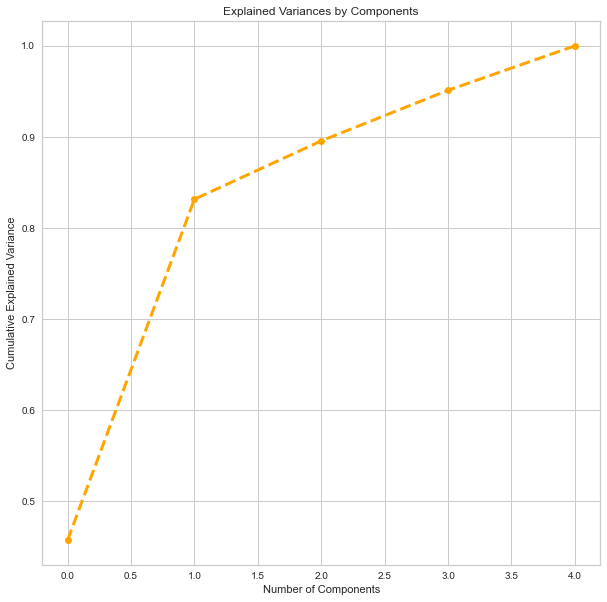

In [57]:
# visulaize the Explained Individual Components
plt.figure(figsize = (10,10))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--', color ='orange', lw = 3)
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [58]:
pca = PCA(.9,svd_solver ='full') # svd_solver -full helps to converge faster in case of very large data set
pca.fit(subset_scaled_df2)

PCA(n_components=0.9, svd_solver='full')

In [59]:
pca.explained_variance_

array([2.29029906, 1.87416377, 0.3205531 , 0.27826563])

Text(0, 0.5, 'Cumulative Explained Variance')

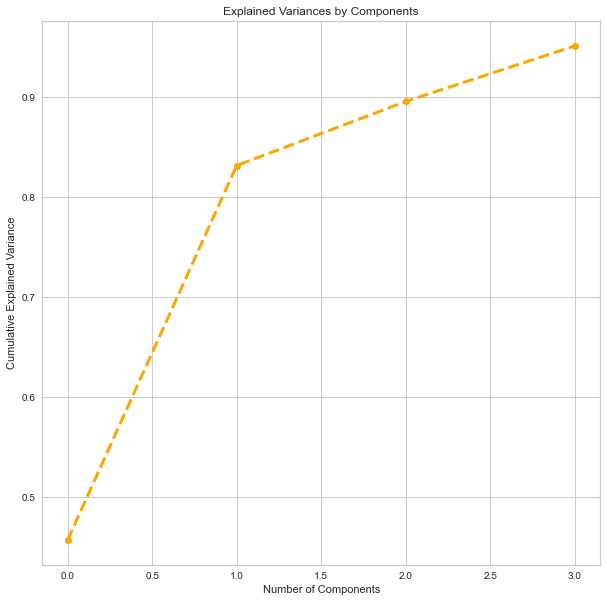

In [60]:
plt.figure(figsize = (10,10))
plt.plot( pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--', color ='orange', lw = 3)
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [61]:
subset_pca = pca.transform(subset_scaled_df2)
subset_pca = pd.DataFrame(subset_pca)

# Clustering

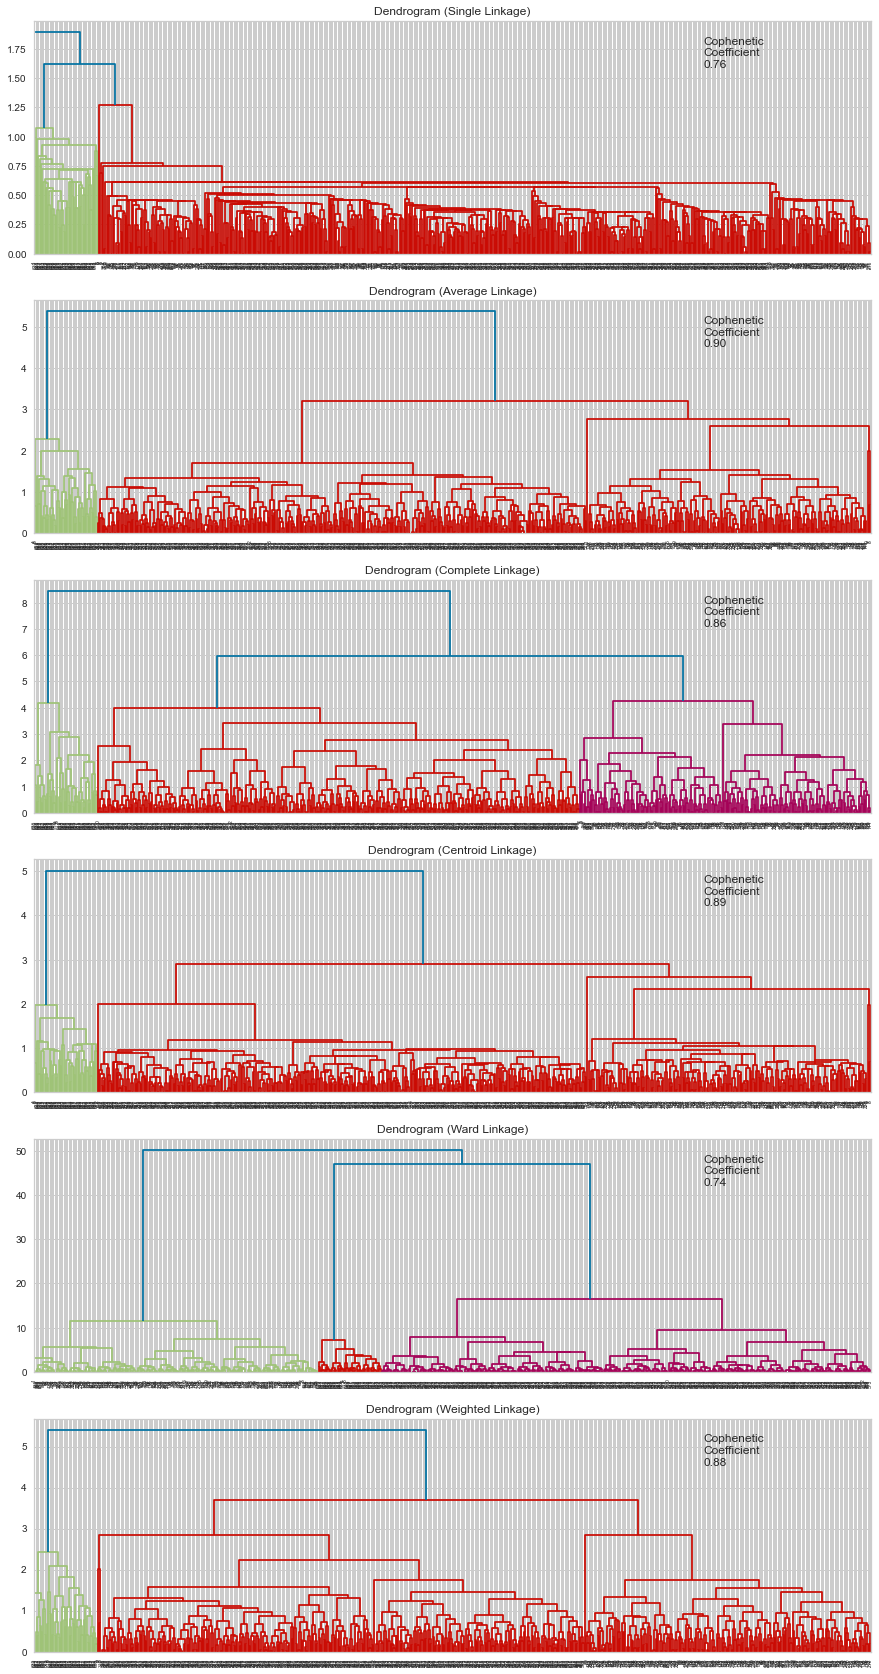

In [62]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
# compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_pca, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df2))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
#     compare.append([method, coph_corr])

In [63]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc_labels = hc.fit_predict(subset_pca)

In [64]:

dff = df.drop(['HC_Clusters'] ,axis=1)
dff['PCA_HC_clusters'] = hc_labels

In [65]:
cluster_profile2 = dff.groupby('PCA_HC_clusters').mean()

In [66]:
# Visualize second cluster profile 2
cluster_profile2.style.highlight_max(color = 'pink', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
PCA_HC_clusters,,,,,,
0,33722.797927,5.512953,3.492228,0.984456,2.000000,0.002591
1,12276.785714,2.415179,0.928571,3.549107,6.870536,0.995536
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000


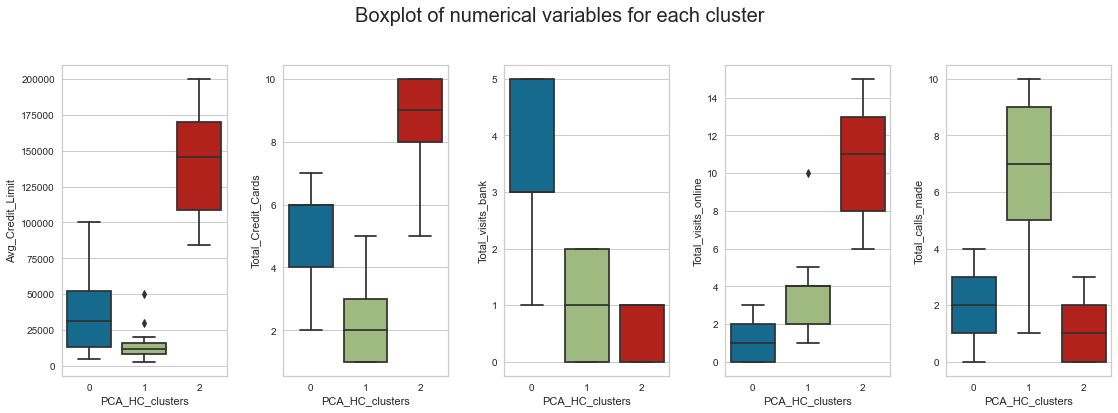

In [67]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=dff[all_col[counter]],x=dff['PCA_HC_clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)


# <a id = "link5"></a> 6.  Actionable Insights & Business Recommendations


## Observations from different types of Clustering as well as employing PCA followed by Clustering

* There are 3 main clusters to review.   These comments for each cluster is based on the IQR values (namely, the behavior between quartiles 25% and 75%) representing typical behavior.  Extremes will be commented on as approporiate.  


### Cluster 0

* Customers have between ~ 12.5K and 55K USD in Average Credit Limit.  Notably, this group of customers have the minimum average credit limit and go up to 100K USD.
* Customers tend to have between 4 and 6 credit cards, but could have as few as 2 and as many as 7.
* They will typically make 3-5 in-person visits to the bank for query/problem resolution.
* They will typcailly make 0-2 online visits, with a max of 3.
* They will make 1-3 calls, with a maximum of 4.

### Cluster 1

* These customer have a very narrow Average Credit limit with outliers up to 50K USD. They tend to have what appears to be very low credit limits in general.  This could be customers who are new to building credit or customers repairing credit.

* They tend to have between 1 and 3 cards and amaximum of 4 cards. Also indicating personal banking usage.

* These customers tend to visit between 0 and 2 times in person, make 2-4 visits on-line, and make the most number of calls.  Their grand max is 10, and over half of them will make between 5 and 9 calls.

### Cluster 2

* This group of customers have the highest credit limits and number of cards typically.  The scale of the limits and number of cards suggest that these could be business accounts.

* This group of customers make 0-1 trips per year and the fewest number of calls.  They prefer to bank on-line and ask/resolve their issues this way.

## Business Recommendations

AllLife is focused on targeting new customers and upselling to exisiting customers through targeted marketing campaigns, with a tertiary goal of improving service levels to these customers.  In this approach, I have chosen the output from KMeans Clustering to suggest guidance.

### Step 1:Customer Segmentation

AllLife should segment their customers based on their stage in the credit journey characterized mainly by their Average Credit Limit and the number of cards they have/need for their accounts. (refer to specific Cluster Attributes above in this same section. I have chosen not to re-state them here.

#### A. Established Customers  (Cluster 0 attributes)


#### B. Credit Builders (Cluster 1 attributes)


#### C. Business Customers (Cluster 2 attributes)


### Step 2:  Target the customers you have for upsell activities & improving service quality perception

Based on these characteristics described for each of the Cluster Attributes, marketing can quick identify specific customers in each segment and build a message around new products, as well as methods to share information based on their preferred engagement channel for questions/problem resolution.  They could also use this as an opportunity to earn trust with these customers, share improvements that have been made in these different channels to improve resolution time, as well as help improve the migration of customers who prefer walk-in and calls to using on-line resolution.  They may also consider enhancing their collateral describing these communication channels and how efficient they can be.  This will give the customer a feel that AllLife cares about their Experience each time they need support.

### Step 3:  Target New Customers

These Cluster Attributes and customer tendencies used in segmentation can be used to do another study of demographics, as well as tailor their outreach programs to include local advertising for customers looking to a bricks and mortar (in-person) experience versus those who engage for Credit Card services on-line.  They may consider techniques such as mailers, GoogleAds, account based marketing, as well as enhancing their websites based on SEO best practices.



